# 1-1,结构化数据建模流程范例

In [2]:
!pip install torch
!pip install 'torchkeras>=4.0.0'

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: "'torchkeras": Expected package name at the start of dependency specifier
    'torchkeras
    ^


In [3]:
import torch 
import torchkeras 
print("torch.__version__ = ", torch.__version__)
print("torchkeras.__version__ = ", torchkeras.__version__) 

torch.__version__ =  2.5.1
torchkeras.__version__ =  4.0.2


<br>

<font color="red">
 
公众号 **算法美食屋** 回复关键词：**pytorch**， 获取本项目源码和所用数据百度云盘下载链接。
    
</font> 


### 一，准备数据

titanic数据集的目标是根据乘客信息预测他们在Titanic号撞击冰山沉没后能否生存。

结构化数据一般会使用Pandas中的DataFrame进行预处理。


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader,TensorDataset

dftrain_raw = pd.read_csv('./eat_pytorch_datasets/titanic/train.csv')
dftest_raw = pd.read_csv('./eat_pytorch_datasets/titanic/test.csv')
dftrain_raw.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [4]:
dfcompare_raw = pd.read_csv('./eat_pytorch_datasets/titanic/test_kaggle.csv')
dfcompare_raw.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


字段说明：

* Survived:0代表死亡，1代表存活【y标签】
* Pclass:乘客所持票类，有三种值(1,2,3) 【转换成onehot编码】
* Name:乘客姓名 【舍去】
* Sex:乘客性别 【转换成bool特征】
* Age:乘客年龄(有缺失) 【数值特征，添加“年龄是否缺失”作为辅助特征】
* SibSp:乘客兄弟姐妹/配偶的个数(整数值) 【数值特征】
* Parch:乘客父母/孩子的个数(整数值)【数值特征】
* Ticket:票号(字符串)【舍去】
* Fare:乘客所持票的价格(浮点数，0-500不等) 【数值特征】
* Cabin:乘客所在船舱(有缺失) 【添加“所在船舱是否缺失”作为辅助特征】
* Embarked:乘客登船港口:S、C、Q(有缺失)【转换成onehot编码，四维度 S,C,Q,nan】


利用Pandas的数据可视化功能我们可以简单地进行探索性数据分析EDA（Exploratory Data Analysis）。

label分布情况

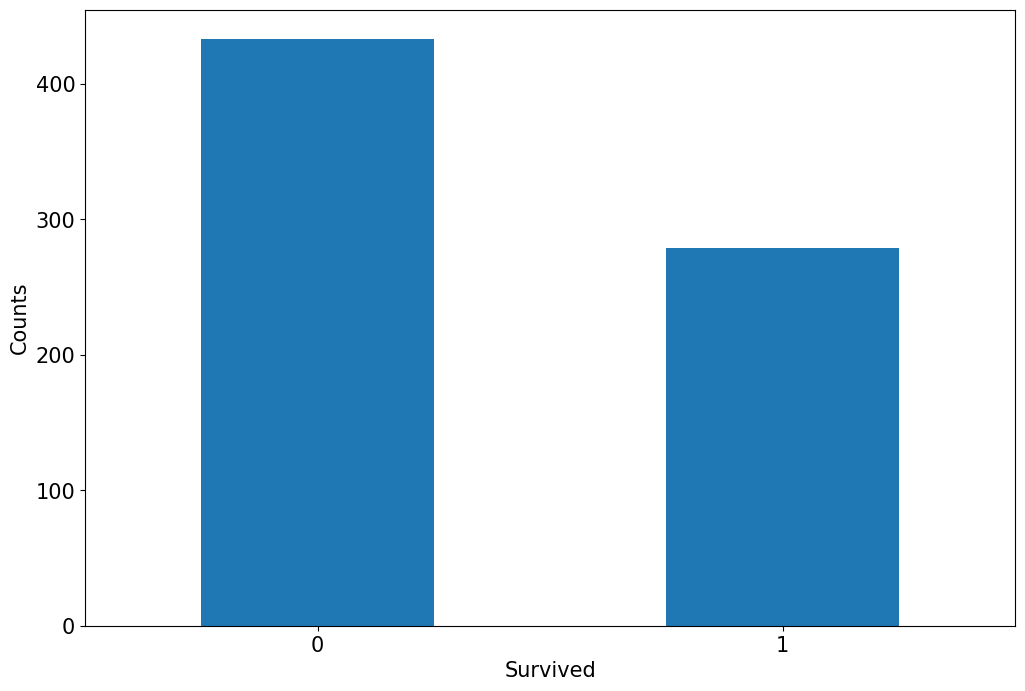

In [6]:
# 导入必要的库 (假设已经导入，因为代码中没有明确的导入语句)
# 通常我们会这样导入:
# import matplotlib.pyplot as plt  # matplotlib.pyplot 库是用来绘制图表的标准库，通常简写为 plt
# import pandas as pd          # pandas 库是用来处理数据的标准库，通常简写为 pd，在这里假设 dftrain_raw 是一个 Pandas DataFrame

# "魔法命令" (Magic command)，用于在 Jupyter Notebook 中内联显示 matplotlib 图表。
# 内联显示意味着图表会直接显示在代码单元格的下方，而不是弹出一个单独的窗口。
# 如果没有这条命令，你可能需要手动调用 plt.show()，并且图表可能会在单独的窗口中打开。
%matplotlib inline

# "魔法命令"，用于配置内联图表的后端 (backend) 格式。
# 'png' 指定图表以 PNG 图片格式渲染，这是一种常见的、通常是好的选择。
# 其他选项包括 'retina' (用于更高分辨率的显示，如果你的系统支持) 或 'svg' (用于矢量图形)。
%config InlineBackend.figure_format = 'png'

# 创建一个柱状图，显示 'dftrain_raw' DataFrame 中 'Survived' 列的不同值的计数。
# 假设 'dftrain_raw' 是一个 Pandas DataFrame，包含生存数据 (例如，来自泰坦尼克号数据集)。
# 假设 'Survived' 是 DataFrame 中的一列，指示乘客是否存活 (例如，0 表示否，1 表示是)。
ax = dftrain_raw['Survived'].value_counts().plot(
    kind='bar',      # 指定我们想要绘制柱状图
    figsize=(12, 8),  # 设置图表的大小为 12 英寸宽，8 英寸高
    fontsize=15,    # 设置轴标签和刻度标签的字体大小为 15
    rot=0            # 将 x 轴标签旋转 0 度 (水平)
)

# 设置 y 轴 (纵轴) 的标签
ax.set_ylabel('Counts', fontsize=15)

# 设置 x 轴 (横轴) 的标签
ax.set_xlabel('Survived', fontsize=15)

# 显示图表。 虽然在使用 %matplotlib inline 时不是绝对必要的，
# 但最好还是包含它，特别是如果你稍后要将图表保存到文件中。
plt.show()


年龄分布情况

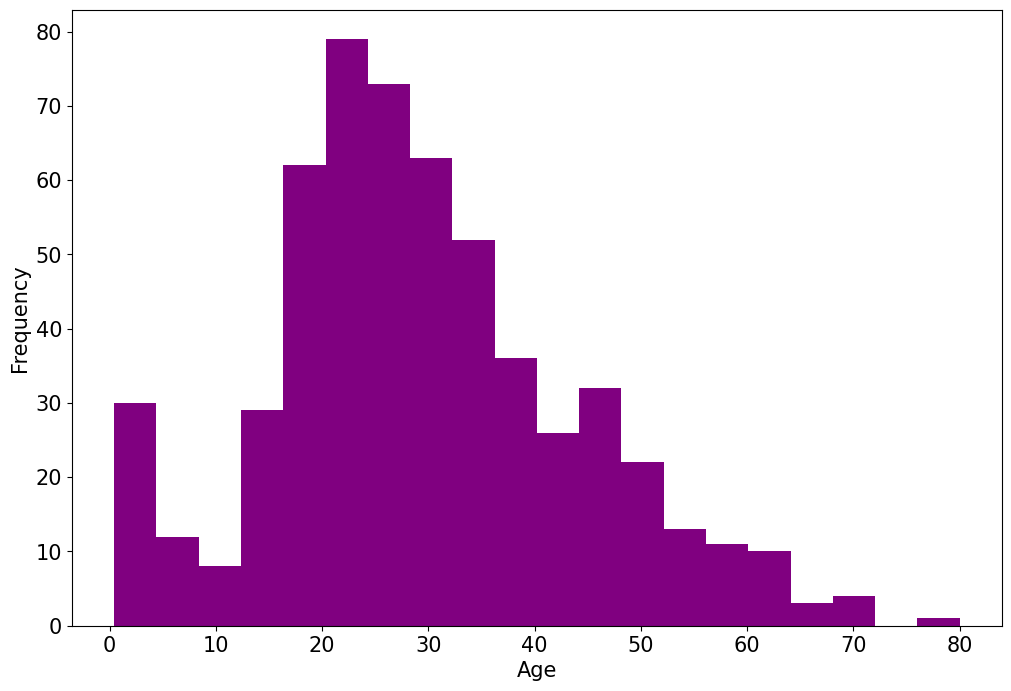

In [6]:
# 导入必要的库 (假设已经导入，如果未导入请添加)
# import matplotlib.pyplot as plt
# import pandas as pd

# "魔法命令"，用于在 Jupyter Notebook 中内联显示 matplotlib 图表。
%matplotlib inline

# "魔法命令"，用于配置内联图表的后端格式为 PNG。
%config InlineBackend.figure_format = 'png'

# 创建一个年龄 (Age) 的直方图 (histogram)。
# 假设 dftrain_raw 是一个 Pandas DataFrame，并且包含名为 'Age' 的列，表示年龄。
ax = dftrain_raw['Age'].plot(
    kind='hist',       # 指定绘制直方图
    bins=20,          # 将年龄分成 20 个区间 (bin)。 区间越多，直方图越精细。
    color='purple',     # 设置直方图的颜色为紫色
    figsize=(12, 8),   # 设置图表大小为 12 英寸宽，8 英寸高
    fontsize=15         # 设置轴标签和刻度标签的字体大小为 15
)

# 设置 y 轴 (纵轴) 的标签为 "Frequency (频率)"
ax.set_ylabel('Frequency', fontsize=15)

# 设置 x 轴 (横轴) 的标签为 "Age (年龄)"
ax.set_xlabel('Age', fontsize=15)

# 显示图表。
plt.show()



在这段代码中，并没有直接计算相关性。 这段代码的目的是通过可视化方式比较不同生存状态下乘客的年龄分布。

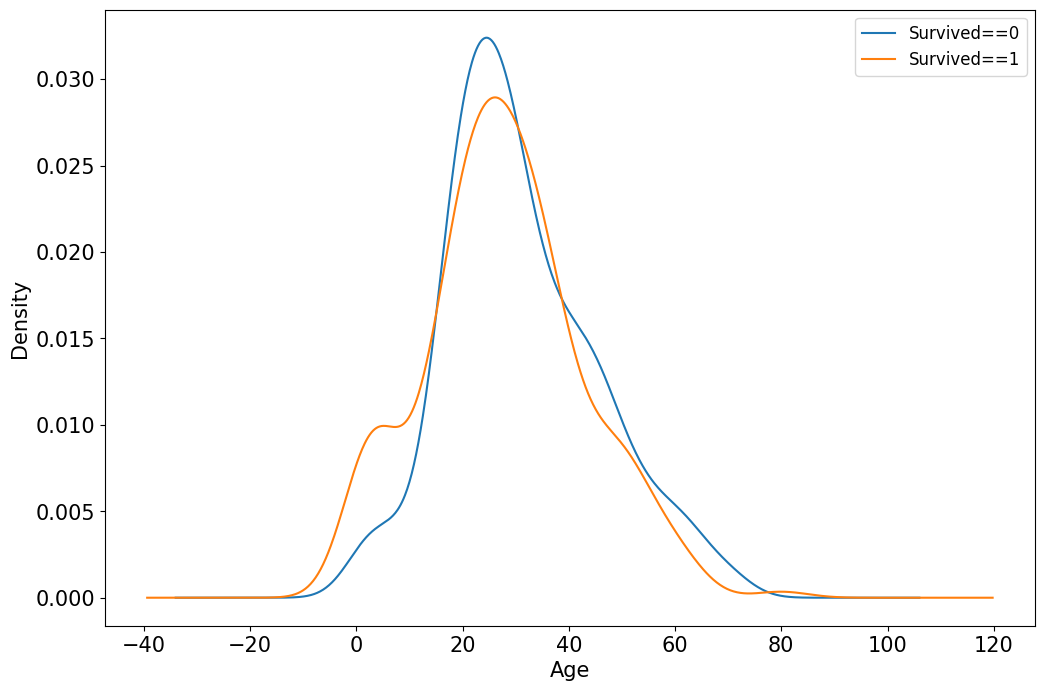

In [7]:
# 导入必要的库 (假设已经导入)
# import matplotlib.pyplot as plt
# import pandas as pd

# "魔法命令"，用于在 Jupyter Notebook 中内联显示 matplotlib 图表。
%matplotlib inline

# "魔法命令"，用于配置内联图表的后端格式为 PNG。
%config InlineBackend.figure_format = 'png'

# 绘制未存活 (Survived == 0) 乘客的年龄 (Age) 的密度图 (density plot)。
ax = dftrain_raw.query('Survived == 0')['Age'].plot(
    kind='density',     # 指定绘制密度图
    figsize=(12, 8),   # 设置图表大小为 12 英寸宽，8 英寸高
    fontsize=15         # 设置轴标签和刻度标签的字体大小为 15
)

# 在同一个图表上绘制存活 (Survived == 1) 乘客的年龄 (Age) 的密度图。
dftrain_raw.query('Survived == 1')['Age'].plot(
    kind='density',     # 指定绘制密度图
    figsize=(12, 8),   # 设置图表大小为 12 英寸宽，8 英寸高
    fontsize=15         # 设置轴标签和刻度标签的字体大小为 15
)

# 添加图例 (legend) 来区分两条密度曲线。
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)

# 设置 y 轴 (纵轴) 的标签为 "Density (密度)"
ax.set_ylabel('Density', fontsize=15)

# 设置 x 轴 (横轴) 的标签为 "Age (年龄)"
ax.set_xlabel('Age', fontsize=15)

# 显示图表。
plt.show()


下面为正式的数据预处理

In [8]:
dftrain_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
708,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
709,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
710,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [10]:
dftest_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
174,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.00,0,0,CA. 2314,7.5500,NaN,S
175,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
176,577,1,2,"Garside, Miss. Ethel",female,34.00,0,0,243880,13.0000,NaN,S
177,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S


In [11]:
def preprocessing(dfdata):
    """
    对 DataFrame 进行预处理，将分类变量转换为数值变量，并处理缺失值。

    Args:
        dfdata: 要预处理的 Pandas DataFrame。

    Returns:
        一个预处理后的 Pandas DataFrame。
    """

    dfresult = pd.DataFrame()  # 创建一个空的 DataFrame，用于存储预处理后的特征

    # Pclass (船舱等级)
    # 使用 one-hot 编码将 Pclass 转换为数值变量。
    dfPclass = pd.get_dummies(dfdata['Pclass']).astype(float)
    # 重命名列，添加 "Pclass_" 前缀，使列名更清晰。
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    # 将 one-hot 编码后的 Pclass 特征添加到结果 DataFrame 中。
    dfresult = pd.concat([dfresult, dfPclass], axis=1)

    # Sex (性别)
    # 使用 one-hot 编码将 Sex 转换为数值变量。
    dfSex = pd.get_dummies(dfdata['Sex']).astype(float)
    # 将 one-hot 编码后的 Sex 特征添加到结果 DataFrame 中。
    dfresult = pd.concat([dfresult, dfSex], axis=1)

    # Age (年龄)
    # 将缺失的年龄值填充为 0。
    dfresult['Age'] = dfdata['Age'].fillna(0)
    # 创建一个新的特征 "Age_null"，指示 Age 是否为缺失值 (1 表示缺失，0 表示非缺失)。
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype(float)

    # SibSp (兄弟姐妹/配偶数量), Parch (父母/子女数量), Fare (船票价格)
    # 直接将这些数值特征添加到结果 DataFrame 中。
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    # Cabin (船舱号)
    # 创建一个新的特征 "Cabin_null"，指示 Cabin 是否为缺失值 (1 表示缺失，0 表示非缺失)。
    dfresult['Cabin_null'] = pd.isna(dfdata['Cabin']).astype(float)

    # Embarked (登船港口)
    # 使用 one-hot 编码将 Embarked 转换为数值变量。
    # dummy_na=True 表示将缺失值也作为一个单独的类别进行编码。
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True).astype(float)
    # 重命名列，添加 "Embarked_" 前缀，使列名更清晰。
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    # 将 one-hot 编码后的 Embarked 特征添加到结果 DataFrame 中。
    dfresult = pd.concat([dfresult, dfEmbarked], axis=1)

    return dfresult  # 返回预处理后的 DataFrame


# 对训练数据进行预处理，并将结果转换为 NumPy 数组。
x_train = preprocessing(dftrain_raw).values
# 提取训练数据的 "Survived" 列作为目标变量，并将结果转换为 NumPy 数组。
y_train = dftrain_raw[['Survived']].values

# 对测试数据进行预处理，并将结果转换为 NumPy 数组。
x_test = preprocessing(dftest_raw).values
# 提取测试数据的 "Survived" 列作为目标变量，并将结果转换为 NumPy 数组。
y_test = dftest_raw[['Survived']].values

# 打印训练数据和测试数据的形状 (shape)。
print("x_train.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)


x_train.shape = (712, 15)
x_test.shape = (179, 15)
y_train.shape = (712, 1)
y_test.shape = (179, 1)


进一步使用DataLoader和TensorDataset封装成可以迭代的数据管道。

In [13]:
# 创建训练数据的数据加载器 (DataLoader)。
dl_train = DataLoader(
    TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).float()),
    shuffle=True,  # 在每个 epoch 开始时对数据进行洗牌 (打乱顺序)。
    batch_size=8   # 设置每个批次 (batch) 的大小为 8。
)

# 创建验证数据的数据加载器 (DataLoader)。
dl_val = DataLoader(
    TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).float()),
    shuffle=False,  # 验证数据不需要洗牌。
    batch_size=8   # 设置每个批次 (batch) 的大小为 8。
)

为什么要设置 shuffle=True (洗牌) 呢？

shuffle=True 参数表示在每个 epoch (训练周期) 开始时，DataLoader 会打乱 (洗牌) 数据集中样本的顺序。这对于训练集 (training dataset) 非常重要，原因如下：

1. 消除数据顺序的影响，防止模型学习到错误的模式：

避免顺序依赖： 在某些情况下，原始数据集中的样本可能存在某种固有的顺序 (例如，按类别、时间顺序排列)。如果不进行洗牌，模型在训练的每个 epoch 中都按照相同的顺序看到数据，可能会错误地学习到数据顺序带来的模式，而不是数据本身的特征。例如，如果训练数据是按类别排序的，模型可能会在训练初期只看到某一类别的样本，导致模型对后续类别的样本学习不足，影响模型的泛化能力。
减少批次间的相关性： 如果不洗牌，相邻批次的数据可能在特征上具有一定的相关性，导致模型在训练过程中接触到的数据分布不够多样化。洗牌可以降低批次之间样本的相关性，使得每个批次更具有代表性，提高训练的有效性。

2. 提高模型的泛化能力：

增加数据多样性： 洗牌使得模型在每个 epoch 都能看到不同顺序的数据，相当于为模型引入了更多的数据变化，可以提高模型对不同数据排列方式的鲁棒性，增强模型的泛化能力，使其在未见过的数据上也能表现良好。
更有效地利用数据： 通过洗牌，每个样本在训练的每个 epoch 中都有机会被模型学习到，确保数据集中的所有样本都得到充分利用，避免某些样本始终在训练的后期才被模型看到，导致学习不足。


为什么验证集 (validation dataset) 通常设置 shuffle=False 呢？

验证目的是评估性能，而非训练： 验证集的主要目的是评估模型在未见过数据上的性能，用于监控训练过程、调整超参数、以及选择最佳模型。验证过程不需要改变数据的顺序，只需要按照固定的顺序将验证数据送入模型进行评估即可。
顺序一致性可能有利于调试和比较： 在某些情况下，保持验证数据的顺序一致性可能有利于调试和比较不同训练阶段的模型性能。例如，当验证集数据存在某种时间或空间顺序时，保持顺序可以更方便地分析模型在不同位置或时间点上的表现。
通常可以忽略验证集的洗牌带来的微小随机性： 验证集的评估结果通常是对整个验证集数据性能的平均。对于足够大的验证集，即使不洗牌，评估结果的随机性也很小，不会对模型评估的准确性产生显著影响。

为什么要设置 batch_size (批次大小) 呢？

batch_size 参数定义了在每次迭代 (iteration) 中模型将处理的样本数量。在深度学习训练过程中，我们通常不会一次性将整个数据集送入模型进行训练，而是将数据集分成更小的批次 (batches) 来进行处理。这样做有以下几个重要的原因：

1. 提高计算效率：

并行计算优势： 现代计算硬件，特别是 GPU (图形处理器)，非常擅长并行计算。当使用批次处理数据时，可以同时计算一个批次中所有样本的梯度，充分利用 GPU 的并行计算能力，显著提高训练速度。
矩阵运算优化： 批次处理可以将多个样本的数据组合成矩阵形式进行运算。线性代数库 (如 BLAS, cuBLAS) 对矩阵运算进行了高度优化，使得批次运算比循环处理单个样本更加高效。

2. 内存效率：

减少内存占用： 深度学习模型，尤其是大型神经网络，以及高分辨率的数据 (如图像、视频)，可能需要大量的内存空间。将数据集分成小批次加载，每次只需要将一个批次的数据加载到内存中，而不是整个数据集，从而显著降低了内存需求，使得即使在内存容量有限的设备上也能训练大型模型或处理大型数据集成为可能。

3. 梯度估计更稳定：

更平滑的梯度： 使用单个样本计算的梯度 (即随机梯度下降 SGD) 可能波动较大，训练过程容易震荡，收敛速度慢且不稳定。批次梯度下降 (Mini-batch Gradient Descent) 通过在一个批次样本上计算平均梯度，可以减小梯度估计的方差，使得梯度更新方向更稳定，训练过程更平滑，更容易收敛到较好的解。
更好地代表总体梯度方向： 一个批次的样本通常比单个样本更能代表整个数据集的分布。因此，基于批次计算的梯度更能反映总体梯度下降的方向，有助于更快地找到全局或较优的局部最优解。


In [14]:
# 测试数据管道 (仅用于演示和调试)
for features, labels in dl_train:
    print(features, labels)  # 打印一个批次的特征和标签。
    break  # 仅打印第一个批次

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.0000, 35.0000,  0.0000,  1.0000,
          0.0000, 52.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.0000, 23.0000,  0.0000,  0.0000,
          0.0000, 13.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 50.0000,  0.0000,  1.0000,
          0.0000, 55.9000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 64.0000,  0.0000,  0.0000,
          0.0000, 26.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  7.5500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 60.0000,  0.0000,  0.0000,
          0.0000, 26.5500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0

## 为什么要封装数据管道？

封装数据管道的主要原因是为了：

简化数据加载和预处理：

DataLoader 自动处理数据的加载、批次划分和洗牌，无需手动编写代码。
这使得代码更简洁、更易于阅读和维护。
提高训练效率：

DataLoader 可以使用多线程并行加载数据，从而提高训练速度。
小批次训练可以减少内存消耗，并允许使用更大的数据集进行训练。
支持数据增强：

DataLoader 可以与数据增强技术结合使用，例如图像旋转、缩放、裁剪等。
数据增强可以增加训练数据的多样性，从而提高模型的泛化能力。
方便数据迭代：

DataLoader 提供了方便的迭代器接口，可以轻松地遍历数据集中的所有批次。

---

核心流程总结：

数据加载 (Data Loading):

使用 Pandas 加载训练数据 (dftrain_raw) 和测试数据 (dftest_raw)。
这是整个流程的起点，确保你拥有可以操作的数据。
数据预处理 (Data Preprocessing):

定义 preprocessing 函数，用于将原始数据转换为适合机器学习模型训练的格式。
关键步骤包括：
One-Hot 编码: 将分类变量转换为数值变量。
缺失值处理: 填充缺失值，并创建指示缺失值的特征。
数值变量处理: 直接使用数值变量。
数据转换 (Data Transformation):

将预处理后的 Pandas DataFrame 转换为 NumPy 数组 (x_train, y_train, x_test, y_test)。
这是因为后续的 PyTorch 模型需要 NumPy 数组作为输入。
数据管道构建 (Data Pipeline Construction):

使用 PyTorch 的 TensorDataset 和 DataLoader 类创建训练数据和验证数据的数据管道 (dl_train, dl_val)。
TensorDataset 用于将特征和标签组合在一起。
DataLoader 用于自动处理数据的加载、批次划分和洗牌。

### 二，定义模型

使用Pytorch通常有三种方式构建模型：使用nn.Sequential按层顺序构建模型，继承nn.Module基类构建自定义模型，继承nn.Module基类构建模型并辅助应用模型容器进行封装。

此处选择使用最简单的nn.Sequential，按层顺序模型。

In [17]:
def create_net():
    """创建一个用于泰坦尼克号生存预测的神经网络模型。"""
    net = nn.Sequential(
        nn.Linear(15, 20),    # 输入层：15个特征，映射到20个神经元
        nn.ReLU(),            # 激活函数：修正线性单元（ReLU），增加模型的非线性能力
        nn.Linear(20, 15),    # 隐藏层：20个输入，映射到15个神经元
        nn.ReLU(),            # 再次应用ReLU激活函数
        nn.Linear(15, 1),     # 输出层：15个输入，映射到1个输出（生存概率）
        # nn.Sigmoid()        # 注释掉Sigmoid激活函数，因为后续会使用BCEWithLogitsLoss，其中已包含Sigmoid
    )
    return net

net = create_net()  # 创建神经网络模型实例
print(net)          # 打印模型结构，方便检查网络配置


Sequential(
  (0): Linear(in_features=15, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


### 三，训练模型

Pytorch通常需要用户编写自定义训练循环，训练循环的代码风格因人而异。

有3类典型的训练循环代码风格：脚本形式训练循环，函数形式训练循环，类形式训练循环。

此处介绍一种较通用的仿照Keras风格的脚本形式的训练循环。

该脚本形式的训练代码与 torchkeras 库的核心代码基本一致。

torchkeras详情:  https://github.com/lyhue1991/torchkeras 


In [18]:
import os,sys,time
import numpy as np
import pandas as pd
import datetime 
from tqdm import tqdm 

import torch
from torch import nn 
from copy import deepcopy
from torchkeras.metrics import Accuracy


def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    print(str(info)+"\n")
    

loss_fn = nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters(),lr = 0.005)   
metrics_dict = {"acc":Accuracy()}

epochs = 20 
ckpt_path='checkpoint.pt'

#early_stopping相关设置
monitor="val_acc"
patience=5
mode="max"

history = {}

for epoch in range(1, epochs+1):
    printlog("Epoch {0} / {1}".format(epoch, epochs))

    # 1，train -------------------------------------------------  
    net.train()
    
    total_loss,step = 0,0
    
    loop = tqdm(enumerate(dl_train), total =len(dl_train),file = sys.stdout)
    train_metrics_dict = deepcopy(metrics_dict) 
    
    for i, batch in loop: 
        
        features,labels = batch
        #forward
        preds = net(features)
        loss = loss_fn(preds,labels)
        
        #backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
            
        #metrics
        step_metrics = {"train_"+name:metric_fn(preds, labels).item() 
                        for name,metric_fn in train_metrics_dict.items()}
        
        step_log = dict({"train_loss":loss.item()},**step_metrics)

        total_loss += loss.item()
        
        step+=1
        if i!=len(dl_train)-1:
            loop.set_postfix(**step_log)
        else:
            epoch_loss = total_loss/step
            epoch_metrics = {"train_"+name:metric_fn.compute().item() 
                             for name,metric_fn in train_metrics_dict.items()}
            epoch_log = dict({"train_loss":epoch_loss},**epoch_metrics)
            loop.set_postfix(**epoch_log)

            for name,metric_fn in train_metrics_dict.items():
                metric_fn.reset()
                
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]
        

    # 2，validate -------------------------------------------------
    net.eval()
    
    total_loss,step = 0,0
    loop = tqdm(enumerate(dl_val), total =len(dl_val),file = sys.stdout)
    
    val_metrics_dict = deepcopy(metrics_dict) 
    
    with torch.no_grad():
        for i, batch in loop: 

            features,labels = batch
            
            #forward
            preds = net(features)
            loss = loss_fn(preds,labels)

            #metrics
            step_metrics = {"val_"+name:metric_fn(preds, labels).item() 
                            for name,metric_fn in val_metrics_dict.items()}

            step_log = dict({"val_loss":loss.item()},**step_metrics)

            total_loss += loss.item()
            step+=1
            if i!=len(dl_val)-1:
                loop.set_postfix(**step_log)
            else:
                epoch_loss = (total_loss/step)
                epoch_metrics = {"val_"+name:metric_fn.compute().item() 
                                 for name,metric_fn in val_metrics_dict.items()}
                epoch_log = dict({"val_loss":epoch_loss},**epoch_metrics)
                loop.set_postfix(**epoch_log)

                for name,metric_fn in val_metrics_dict.items():
                    metric_fn.reset()
                    
    epoch_log["epoch"] = epoch           
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 3，early-stopping -------------------------------------------------
    arr_scores = history[monitor]
    best_score_idx = np.argmax(arr_scores) if mode=="max" else np.argmin(arr_scores)
    if best_score_idx==len(arr_scores)-1:
        torch.save(net.state_dict(),ckpt_path)
        print("<<<<<< reach best {0} : {1} >>>>>>".format(monitor,
             arr_scores[best_score_idx]),file=sys.stderr)
    if len(arr_scores)-best_score_idx>patience:
        print("<<<<<< {} without improvement in {} epoch, early stopping >>>>>>".format(
            monitor,patience),file=sys.stderr)
        break 
    net.load_state_dict(torch.load(ckpt_path,weights_only=True))
    
dfhistory = pd.DataFrame(history)


================================================================================2025-03-13 23:00:23
Epoch 1 / 20

100%|██████████| 23/23 [00:00<00:00, 743.91it/s, val_acc=0.709, val_loss=0.566]


<<<<<< reach best val_acc : 0.7094972133636475 >>>>>>



================================================================================2025-03-13 23:00:24
Epoch 2 / 20

100%|██████████| 23/23 [00:00<00:00, 836.32it/s, val_acc=0.732, val_loss=0.524]

<<<<<< reach best val_acc : 0.7318435907363892 >>>>>>




================================================================================2025-03-13 23:00:24
Epoch 3 / 20

100%|██████████| 23/23 [00:00<00:00, 818.32it/s, val_acc=0.799, val_loss=0.457]


<<<<<< reach best val_acc : 0.7988826632499695 >>>>>>



================================================================================2025-03-13 23:00:24
Epoch 4 / 20

100%|██████████| 23/23 [00:00<00:00, 838.20it/s, val_acc=0.771, val_loss=0.517]

================================================================================2025-03-13 23:00:24
Epoch 5 / 20

100%|██████████| 23/23 [00:00<00:00, 720.67it/s, val_acc=0.804, val_loss=0.433]


<<<<<< reach best val_acc : 0.8044692873954773 >>>>>>



================================================================================2025-03-13 23:00:24
Epoch 6 / 20

100%|██████████| 23/23 [00:00<00:00, 555.58it/s, val_acc=0.804, val_loss=0.432]

================================================================================2025-03-13 23:00:25
Epoch 7 / 20

100%|██████████| 23/23 [00:00<00:00, 638.12it/s, val_acc=0.799, val_loss=0.447]

================================================================================2025-03-13 23:00:25
Epoch 8 / 20

100%|██████████| 23/23 [00:00<00:00, 824.16it/s, val_acc=0.804, val_loss=0.438]

================================================================================2025-03-13 23:00:25
Epoch 9 / 20

100%|██████████| 23/23 [00:00<00:00, 808.95it/s, val_acc=0.771, val_loss=0.436]

================================================================================2025-03-13 23:00:25
Epoch 10 / 20

100%|██████████| 23/23 [00:00<00:00, 576.55it/s, val_acc=0.816, val_loss=0.429]

<<<<<< reach best val_acc : 0.8156424760818481 >>>>>>




================================================================================2025-03-13 23:00:26
Epoch 11 / 20

100%|██████████| 23/23 [00:00<00:00, 640.60it/s, val_acc=0.777, val_loss=0.486]

================================================================================2025-03-13 23:00:26
Epoch 12 / 20

100%|██████████| 23/23 [00:00<00:00, 743.92it/s, val_acc=0.765, val_loss=0.429]

================================================================================2025-03-13 23:00:26
Epoch 13 / 20

100%|██████████| 23/23 [00:00<00:00, 569.29it/s, val_acc=0.793, val_loss=0.409]

================================================================================2025-03-13 23:00:26
Epoch 14 / 20

100%|██████████| 23/23 [00:00<00:00, 454.94it/s, val_acc=0.788, val_loss=0.417]

================================================================================2025-03-13 23:00:27
Epoch 15 / 20

100%|██████████| 23/23 [00:00<00:00, 512.29it/s, val_acc=0.804, val_loss=0.411]


<<<<<< val_acc without improvement in 5 epoch, early stopping >>>>>>


### 四，评估模型

我们首先评估一下模型在训练集和验证集上的效果。

In [19]:
dfhistory 

,train_loss,train_acc,val_loss,val_acc,epoch
0,0.648186,0.658708,0.565753,0.709497,1
1,0.591220,0.730337,0.523859,0.731844,2
2,0.516099,0.769663,0.456947,0.798883,3
3,0.542589,0.773876,0.516749,0.770950,4
4,0.492708,0.799157,0.433484,0.804469,5
5,0.500560,0.793539,0.432259,0.804469,6
6,0.467979,0.789326,0.447360,0.798883,7
7,0.489084,0.790730,0.437567,0.804469,8
8,0.474131,0.787921,0.436090,0.770950,9
9,0.475082,0.794944,0.428570,0.815642,10


In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

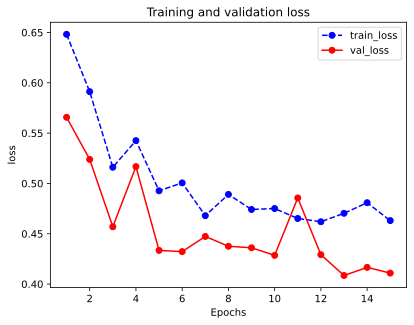

In [21]:
plot_metric(dfhistory,"loss")

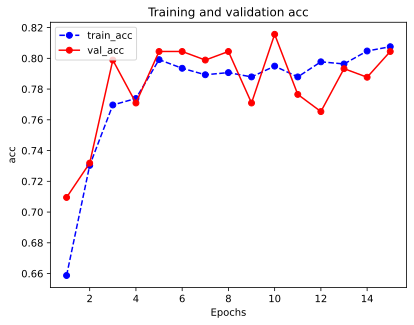

In [22]:
plot_metric(dfhistory,"acc")

### 五，使用模型

In [30]:
# 获取模型预测的原始输出（logits）
raw_logits = net(torch.tensor(x_test).float()).data
print("原始输出 (logits):", raw_logits[:10])  # 打印前10个样本的logits值

# 将logits转换为概率值
y_pred_probs = torch.sigmoid(raw_logits)
print("预测概率 (sigmoid后):", y_pred_probs[:10])  # 这里的值都在0到1之间

# 将概率值转换为二分类结果（0或1）
#y_pred = (y_pred_probs > 0.5).float()
#print("二分类预测 (阈值0.5):", y_pred[:10])  # 这里的值只有0或1

# 计算准确率
#accuracy = (y_pred == torch.tensor(y_test).float()).float().mean().item()
#print(f"测试集准确率: {accuracy:.4f}")

原始输出 (logits): tensor([[-0.7423],
        [ 0.7701],
        [-0.0971],
        [ 5.9569],
        [ 0.8135],
        [ 1.8051],
        [-1.3627],
        [ 2.2851],
        [ 0.7476],
        [-2.0148]])
预测概率 (sigmoid后): tensor([[0.3225],
        [0.6835],
        [0.4757],
        [0.9974],
        [0.6928],
        [0.8588],
        [0.2038],
        [0.9076],
        [0.6787],
        [0.1177]])


In [31]:
# 将概率值转换为类别预测（二分类）
# 这是使用PyTorch的torch.where函数，它不是sigmoid函数
# sigmoid函数已经在前一个单元格中被应用于模型输出，生成了概率值y_pred_probs

# torch.where(condition, x, y) 函数的作用是：
# - 如果条件为True，返回x中的元素
# - 如果条件为False，返回y中的元素
# 在这里，如果概率值大于0.5，我们预测类别为1（存活）
# 如果概率值小于等于0.5，我们预测类别为0（未存活）

y_pred = torch.where(y_pred_probs > 0.5,
        torch.ones_like(y_pred_probs),  # 大于阈值0.5则为1（存活）
        torch.zeros_like(y_pred_probs)) # 小于等于阈值0.5则为0（未存活）
y_pred

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
      

*   **上部分 (预测概率):**  这部分代码使用 Sigmoid 函数将模型的原始输出 (logits) 转换为概率值。 这些概率值表示模型认为该样本属于正类的可能性。 这一步是模型进行分类预测的基础，它给出了每个样本属于某个类别的置信度。

*   **下部分 (添加决策边界):**  这部分代码使用阈值 (通常是 0.5) 将概率值转换为最终的类别预测。 换句话说，它在概率空间中添加了一条决策边界，用于区分不同的类别。 超过阈值的样本被归为一类，低于阈值的样本被归为另一类。

**更详细的解释：**

1.  **Sigmoid 输出 (概率):**

    *   `y_pred_probs = torch.sigmoid(net(torch.tensor(x_test[0:10]).float())).data`
    *   这行代码首先将测试数据输入到训练好的模型 `net` 中。 模型会生成一些原始输出值，这些值被称为 "logits"。
    *   然后，`torch.sigmoid()` 函数将这些 logits 转换为概率值，范围在 0 到 1 之间。 这些概率值可以被解释为模型对每个样本属于正类的置信度。 例如，如果一个样本的概率值为 0.8，则模型认为该样本有 80% 的可能性属于正类。

2.  **决策边界 (阈值):**

    *   `y_pred = torch.where(y_pred_probs > 0.5, ...)`
    *   这行代码使用 `torch.where()` 函数根据概率值创建一个二元预测。
    *   `y_pred_probs > 0.5`：  这是一个条件语句，用于检查每个概率值是否大于 0.5。
    *   `torch.ones_like(y_pred_probs)`：  如果概率值大于 0.5，则将该样本预测为正类 (1)。
    *   `torch.zeros_like(y_pred_probs)`：  如果概率值小于或等于 0.5，则将该样本预测为负类 (0)。
    *   **作用：**  这行代码本质上是添加了一条决策边界。 概率值大于 0.5 的样本被划分到正类，概率值小于或等于 0.5 的样本被划分到负类。

**总结：**

*   Sigmoid 函数将模型的原始输出转换为概率值，表示模型对样本属于某个类别的置信度。
*   决策边界 (阈值) 用于将概率值转换为最终的类别预测。 决策边界将样本划分到不同的类别。

**一个比喻：**

你可以将 Sigmoid 函数想象成一个温度计，它测量的是模型对某个样本属于正类的 "温度"。 阈值就像一个开关，当温度超过某个值时，开关就会打开，表示该样本被预测为正类。

希望这个解释更清晰！


### 六，保存模型

Pytorch 有两种保存模型的方式，都是通过调用pickle序列化方法实现的。

第一种方法只保存模型参数。

第二种方法保存完整模型。

推荐使用第一种，第二种方法可能在切换设备和目录的时候出现各种问题。


**1，保存模型参数(推荐)**

In [32]:
# ----------------------------------------------------------------------
# 1. 模型保存
# ----------------------------------------------------------------------

# 打印模型的状态字典 (state_dict) 的键 (keys)
print(net.state_dict().keys())

# 保存模型参数 (状态字典) 到文件
torch.save(net.state_dict(), "./data/net_parameter.pt")

print("模型参数已保存到 ./data/net_parameter.pt")


# ----------------------------------------------------------------------
# 2. 模型加载和预测
# ----------------------------------------------------------------------


# 创建一个新的模型实例 (克隆模型)
net_clone = create_net()

# 加载模型参数 (状态字典) 到克隆模型中
net_clone.load_state_dict(torch.load("./data/net_parameter.pt", weights_only=True))

print("模型参数已加载")

# 设置模型为评估模式 (重要！)
# 这会关闭 dropout 和 batch normalization 等训练时使用的层
net_clone.eval()

# 在评估模式下，不需要计算梯度
with torch.no_grad():
    # 使用克隆模型进行预测，并应用 Sigmoid 函数
    # 注意：这里使用了 no_grad()，因为我们只是进行预测，不需要计算梯度
    y_pred_probs = torch.sigmoid(net_clone(torch.tensor(x_test[0:10]).float())).data

print("预测概率:", y_pred_probs)

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])
模型参数已保存到 ./data/net_parameter.pt
模型参数已加载
预测概率: tensor([[0.3225],
        [0.6835],
        [0.4757],
        [0.9974],
        [0.6928],
        [0.8588],
        [0.2038],
        [0.9076],
        [0.6787],
        [0.1177]])


In [56]:
# 保存模型参数
torch.save(net.state_dict(), "./data/net_parameter.pt")

net_clone = create_net()
net_clone.load_state_dict(torch.load("./data/net_parameter.pt",weights_only=True))

torch.sigmoid(net_clone.forward(torch.tensor(x_test[0:10]).float())).data


tensor([[0.1245],
        [0.6460],
        [0.4065],
        [0.6882],
        [0.5689],
        [0.8385],
        [0.0807],
        [0.7849],
        [0.2752],
        [0.1420]])

**2，保存完整模型(不推荐)**

In [20]:
torch.save(net, './data/net_model.pt')
net_loaded = torch.load('./data/net_model.pt',weights_only=False)
torch.sigmoid(net_loaded(torch.tensor(x_test[0:10]).float())).data


tensor([[0.0771],
        [0.6915],
        [0.3397],
        [0.9527],
        [0.6116],
        [0.8747],
        [0.1023],
        [0.8377],
        [0.5713],
        [0.0841]])